1. IMPORT THE DATA

In [1]:
import pandas as pd #data manipulation
import numpy as np #maths
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #statistical visualisation

In [2]:
fashion_train_df = pd.read_csv('Downloads/P39-Fashion-MNIST-Datasets/fashion-mnist_train.csv', sep = ',')

In [3]:
fashion_test_df = pd.read_csv('Downloads/P39-Fashion-MNIST-Datasets/fashion-mnist_test.csv', sep = ',')

2. VISUALIZATION OF THE DATASET

In [4]:
fashion_train_df.head() #pictures desribed as pixels

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
training = np.array(fashion_train_df, dtype = 'float32')

In [11]:
testing = np.array(fashion_test_df, dtype = 'float32')

1.0

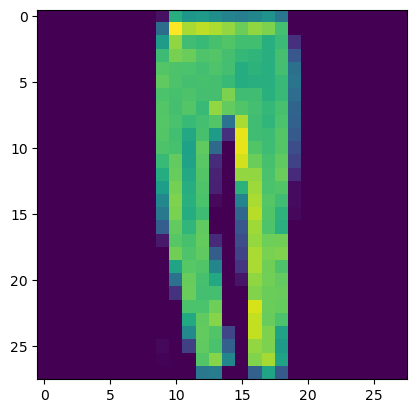

In [12]:
import random
random = random.randint(1, 60000)
plt.imshow(training[random, 1:].reshape(28, 28)) #array starts from 1 cause I want to skip the label
label = training[random, 0]
label

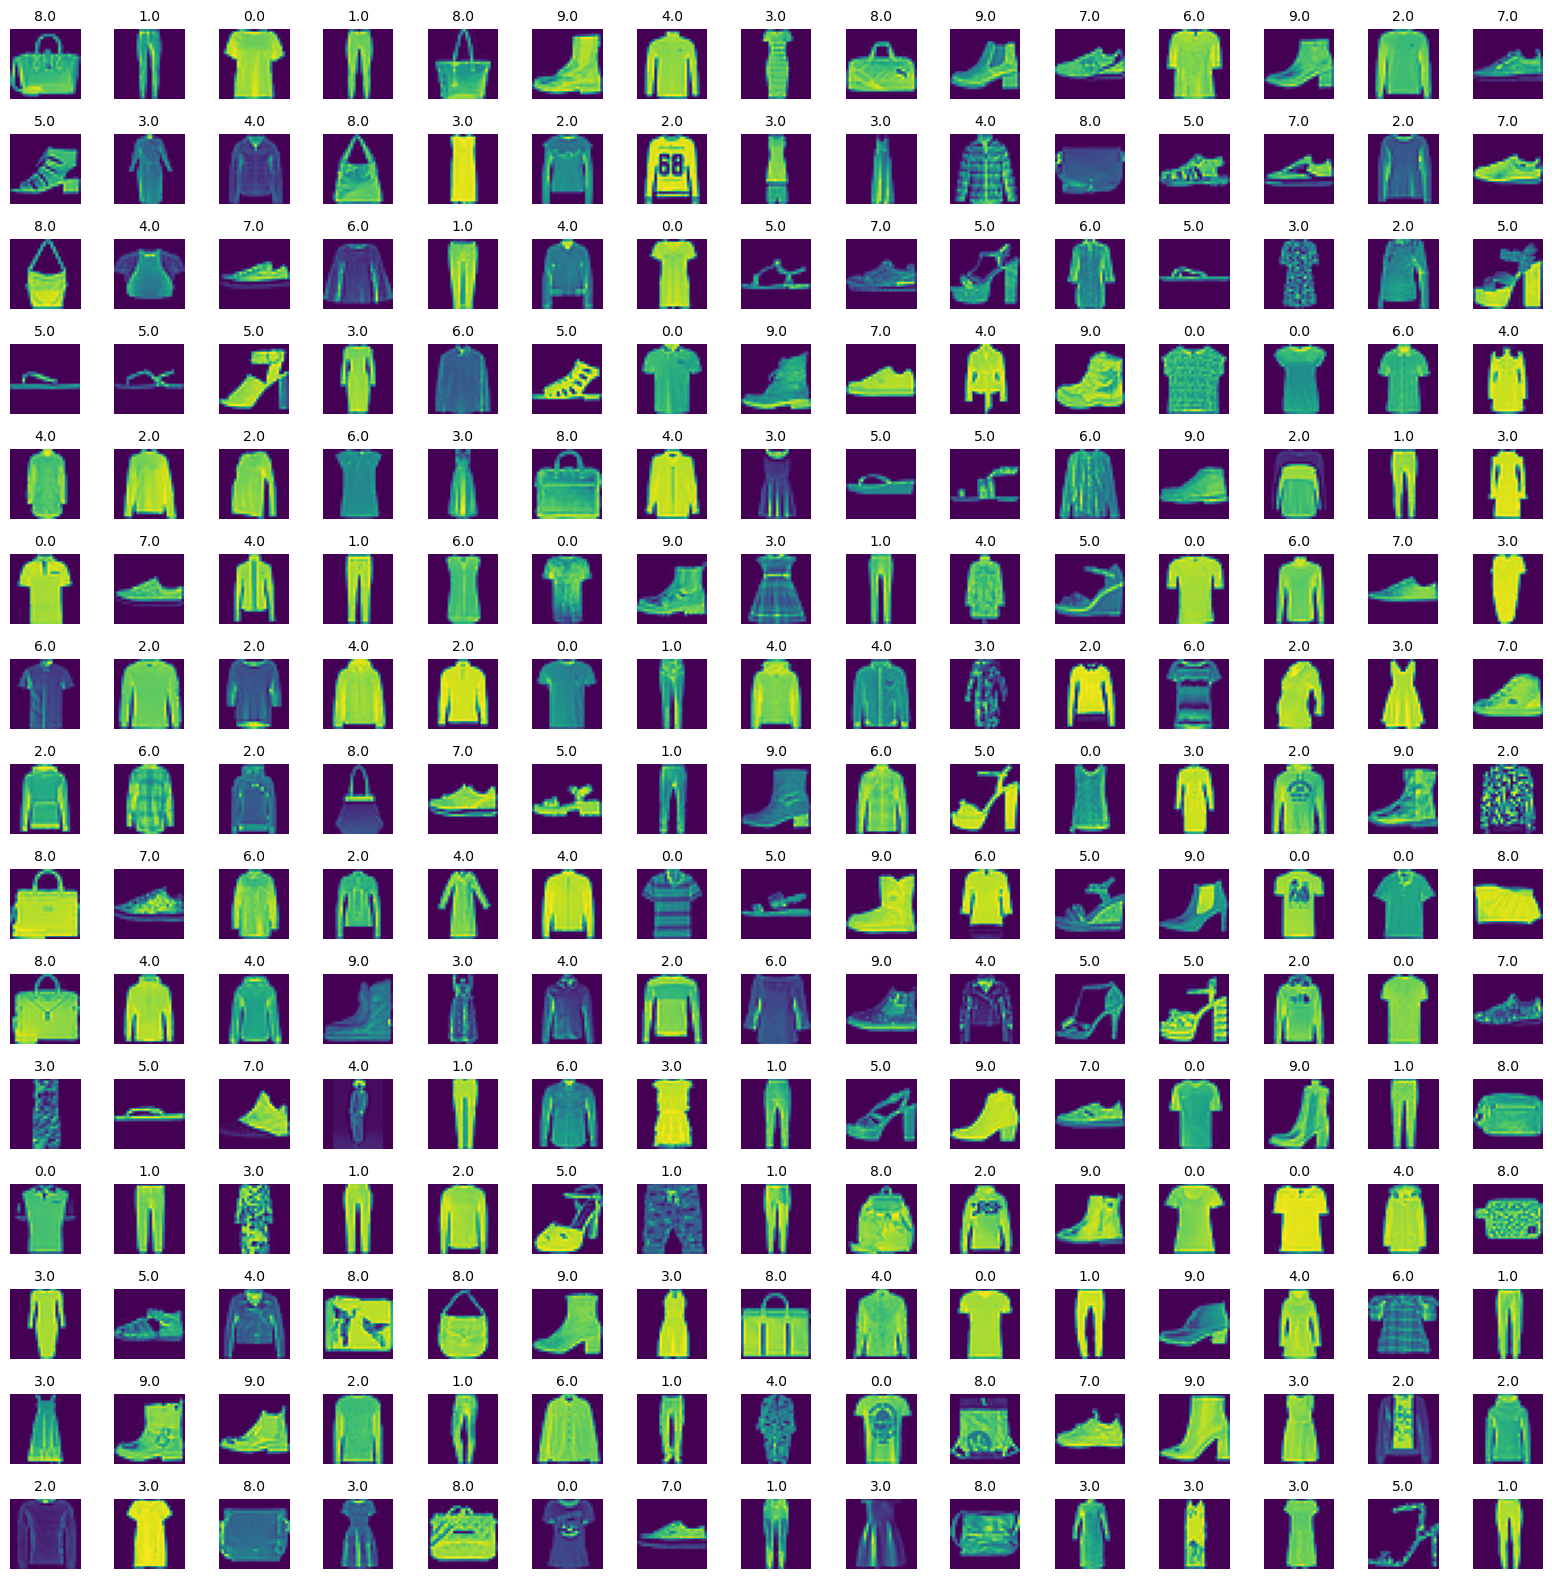

In [13]:
Width_grid = 15
Length_grid = 15

fig, axes = plt.subplots(Length_grid, Width_grid, figsize = (20,20))

axes = axes.ravel() #converts 2d array into 1d

n_training = len(training)

for i in np.arange(0, Width_grid * Length_grid):
    index = np.random.randint(0, n_training)
    
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(training[index, 0], fontsize = 10)
    axes[i].axis('off') #turns off the axis of each picture
    
plt.subplots_adjust(hspace = 0.5)

3. NEURAL NETWORKS AND DEEP LEARNING (MODEL TRAINING)
- neurons collect data from input channels (dendrits) and generate the output (learnings) to the axon
- sum up inputs with their weights, and through a function deduct an output

- 1. we have to use CONVOLUTIONAL LAYER NEURAL NETWORK because with images pixels are dependant on the pixels around it
- 2. feature detector in the matrix (kernel)
- 3. RELU CONVOLUTIONAL LAYER - adds non-linearity to the feature map, numbers <0 in the matrix become 0
- 4. MAXPOOLING AND FLATTENING CONVOLUTIONAL LAYER - during maxpooling we cut it "by half" f.e. form 4x4 to 2x2 and choose just the largest number out of the 2x2 pool, this helps to generalize the model 
- 5. flattening means it is rearranged from the matrix form to a column so it can be feeded to the network

In [14]:
X_train = training[:,1:]/255 #excluding the 'label' column 
y_train = training[:,0]

In [15]:
X_test = testing[:,1:]/255 #divided by 255 for normalisation
y_test= testing[:,0]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)
#only testing 0.2 of the dataset, the rest is for training

In [18]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1)) 
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))
#shape[0] because we want to add the new dimension at the beginnnig of the array

In [19]:
X_train.shape

(48000, 28, 28, 1)

In [20]:
X_validate.shape

(12000, 28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28, 1)

In [23]:
import keras

In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [48]:
cnn_model = Sequential()

In [49]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

In [50]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [51]:
cnn_model.add(Flatten())

In [52]:
cnn_model.add(Dense(units = 32, activation = 'relu'))
#Dense = basic layer, connects all the inputs from the previous layer
#units = specifies number of neurons (output dimension)
#ReLU = returns 0 for values less than 0, and itslef for values larger than 0

In [53]:
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))
#sigmoid = often used as the last layer bc it returns (0,1) which can be interpreted as probability values

In [55]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])
#loss = loss function measures the difference between the true values of the classes and the probabilities that the model predicts for each class
#optimizer = Adam is an algorithm that determines how quickly the model adapts to changes, smaller values of learning rate lead to slower learning
#metrics = evaluate model performance, shows how well and accurately it predicts the target values 

In [60]:
cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))
#batch_size = the size of the data batch that is used for one update of the model weights during training
#verbose = sets the level of displayed messages during training, a value of 1 means that we want to display continuous messages

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8871 - loss: 0.3046 - val_accuracy: 0.8722 - val_loss: 0.3527
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8876 - loss: 0.3027 - val_accuracy: 0.8710 - val_loss: 0.3572
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8884 - loss: 0.3054 - val_accuracy: 0.8702 - val_loss: 0.3573
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8903 - loss: 0.2979 - val_accuracy: 0.8727 - val_loss: 0.3561
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8901 - loss: 0.3015 - val_accuracy: 0.8694 - val_loss: 0.3584
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8910 - loss: 0.2964 - val_accuracy: 0.8696 - val_loss: 0.3578
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8879 - loss: 0.3019 - val_accuracy: 0.8747 - val_loss: 0.3530
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8888 - loss: 0.3022 - val_accuracy: 0.8723 - val_loss:

4. EVALUATING THE MODEL

In [61]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test accuracy: {:.3f}'.format(evaluation[1]))
#[0] contains loss of the model
#[1] contains evaluation of the model

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8765 - loss: 0.3402
Test accuracy: 0.876


In [63]:
predicted_probabilities = cnn_model.predict(X_test)
#uses a trained model (cnn_model) to predict probabilities for each class for test data (X_test)

predicted_classes = np.argmax(predicted_probabilities, axis=1)
#finds the index with the highest value (probabilities) in each row of the 'predicted probabilities' array and returns the array index

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step


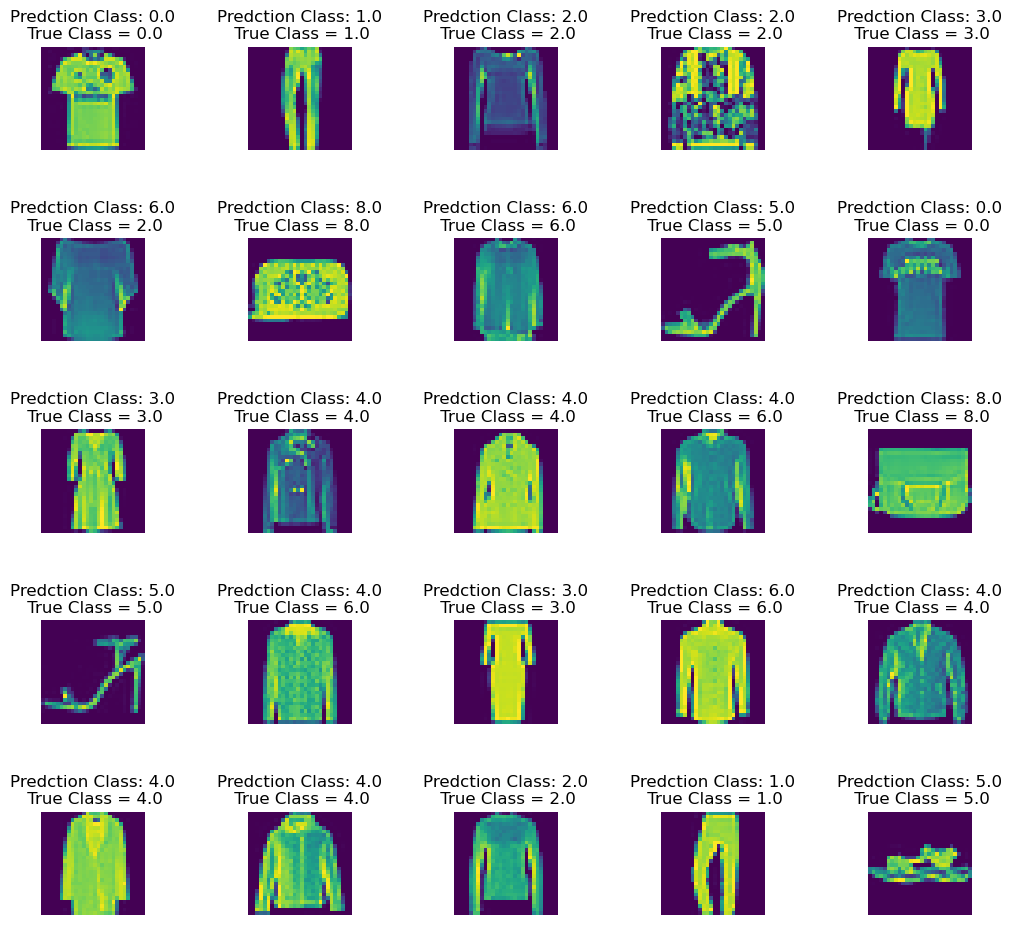

In [69]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel() #converts a 2D array into 1D

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predction Class: {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off') #turns off the axis description of the images
    
plt.subplots_adjust(wspace = 1)

<Axes: >

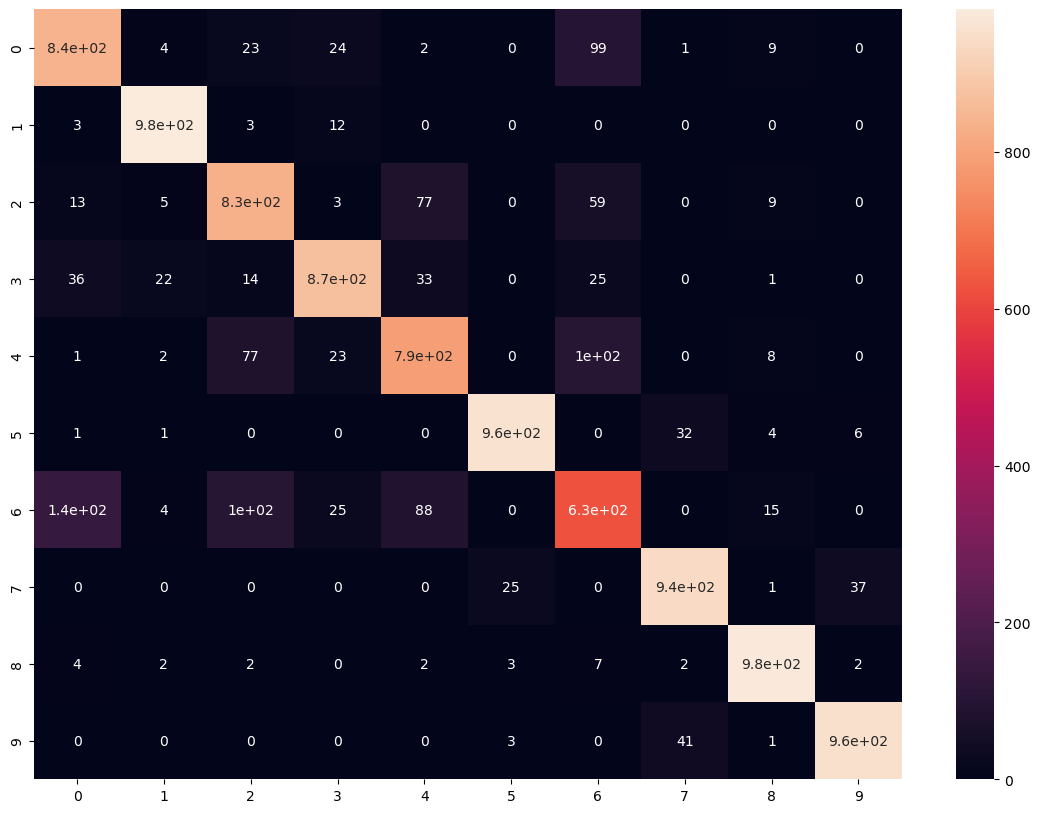

In [72]:
#confusion matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True)

#heatmap show which has been evaluated correctly and which incorrectly

In [80]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names=target_names))

#f.e. shirts and trousers etc could be easily mistaken, therefore the precision is not that high

              precision    recall  f1-score   support

     Class 0       0.81      0.84      0.82      1000
     Class 1       0.96      0.98      0.97      1000
     Class 2       0.79      0.83      0.81      1000
     Class 3       0.91      0.87      0.89      1000
     Class 4       0.80      0.79      0.79      1000
     Class 5       0.97      0.96      0.96      1000
     Class 6       0.68      0.63      0.65      1000
     Class 7       0.92      0.94      0.93      1000
     Class 8       0.95      0.98      0.96      1000
     Class 9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.88     10000
weighted avg       0.87      0.88      0.88     10000



5. IMPROVING THE MODEL
- can be improved either by adding filter or dropping out or both